## Final Project Submission

Please fill out:
* Student name: Arinze Iwunze 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

import seaborn as sns
from scipy import stats
sns.set_style('ticks')

In [96]:
kc = pd.read_csv('kc_house_data.csv')

In [97]:
kc.shape

(21597, 21)

In [98]:
kc.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [99]:
kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [100]:
kc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [101]:
kc.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [102]:
kc.isna().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront        True
view              True
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated      True
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [103]:
kc.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [104]:
kc['waterfront'].sum()

146.0

In [105]:
kc['waterfront'] = kc['waterfront'].fillna(value=False)
kc['yr_renovated'] = kc['yr_renovated'].fillna(value=kc.yr_built)

In [106]:
kc.view.unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [107]:
kc.view.value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [108]:
kc.view.isna().sum()

63

In [109]:
kc = kc.dropna(subset=['view'])

In [110]:
kc.view.isna().sum()

0

In [111]:
kc.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [112]:
kc.sqft_basement.unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0', '620.0',
       '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0', '450.0',
       '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0', '1070.0',
       '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0', '210.0',
       '1430.0', '1950.0', '440.0', '220.0', '1160.0', '860.0', '580.0',
       '2060.0', '1820.0', '1180.0', '200.0', '1150.0', '1200.0', '680.0',
       '530.0', '1450.0', '1170.0', '1080.0', '960.0', '280.0', '870.0',
       '1100.0', '460.0', '1400.0', '660.0', '1220.0', '900.0', '420.0',
       '1580.0', '1380.0', '475.0', '690.0', '270.0', 

In [113]:
kc.sqft_basement = kc.sqft_basement.replace(to_replace='?', value=0.0)

In [114]:
kc.sqft_basement.unique()

array(['0.0', '400.0', '910.0', '1530.0', 0.0, '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0', '620.0',
       '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0', '450.0',
       '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0', '1070.0',
       '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0', '210.0',
       '1430.0', '1950.0', '440.0', '220.0', '1160.0', '860.0', '580.0',
       '2060.0', '1820.0', '1180.0', '200.0', '1150.0', '1200.0', '680.0',
       '530.0', '1450.0', '1170.0', '1080.0', '960.0', '280.0', '870.0',
       '1100.0', '460.0', '1400.0', '660.0', '1220.0', '900.0', '420.0',
       '1580.0', '1380.0', '475.0', '690.0', '270.0', 

In [115]:
kc.view = kc.view.astype("int64")
kc.waterfront = kc.waterfront.astype("bool")
kc.sqft_basement = kc.sqft_basement.astype("float64")
kc.yr_renovated = kc.yr_renovated.astype('int64')
kc.zipcode = kc.zipcode.astype('str')

In [116]:
kc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 21 columns):
id               21534 non-null int64
date             21534 non-null object
price            21534 non-null float64
bedrooms         21534 non-null int64
bathrooms        21534 non-null float64
sqft_living      21534 non-null int64
sqft_lot         21534 non-null int64
floors           21534 non-null float64
waterfront       21534 non-null bool
view             21534 non-null int64
condition        21534 non-null int64
grade            21534 non-null int64
sqft_above       21534 non-null int64
sqft_basement    21534 non-null float64
yr_built         21534 non-null int64
yr_renovated     21534 non-null int64
zipcode          21534 non-null object
lat              21534 non-null float64
long             21534 non-null float64
sqft_living15    21534 non-null int64
sqft_lot15       21534 non-null int64
dtypes: bool(1), float64(6), int64(12), object(2)
memory usage: 3.5+ MB


In [117]:
kc.date = pd.to_datetime(kc.date, format='%m/%d/%Y')

In [118]:
kc.date.head()

0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
Name: date, dtype: datetime64[ns]

In [119]:
kc.sqft_living15.unique()

array([1340, 1690, 2720, 1360, 1800, 4760, 2238, 1780, 2390, 2210, 1330,
       1370, 2140, 1890, 1610, 1060, 1280, 1400, 4110, 2240, 1220, 2200,
       1030, 1760, 1860, 1520, 2630, 2580, 1390, 1460, 1570, 2020, 1590,
       2160, 1730, 1290, 2620, 2470, 2410, 3625, 1580, 3050, 1228, 2680,
        970, 1190, 1990, 1410, 1480, 2730, 1950, 2250, 2690, 2960, 2270,
       2570, 2500, 1440, 2750, 2221, 1010, 3390, 3530, 1640, 1510, 2420,
       1940, 3240, 1680,  890, 1130, 3350, 2350, 1870, 1720, 1850, 1900,
       1980, 2520, 1350, 1750, 1160, 1650, 2550, 2370, 1240, 1270, 2990,
       1380, 1540, 2090, 1830, 1620, 1880, 2340, 1710, 2700, 3060, 2660,
       1700, 1420, 2060, 2480, 1550, 1170, 2820, 1560, 2230, 2840, 1450,
       1500, 3160, 2640, 1200, 3400, 2110, 2920, 1770, 1070, 1930, 3740,
       2260, 1670, 2290, 1050, 2540, 2190, 2030, 1230, 2330, 1300, 1430,
       1250, 1630, 2590, 2130, 1100, 3836, 1320, 2120, 3070, 1910, 2080,
       1960, 2280, 1150, 3430, 2070, 2600,  830, 12

In [120]:
kc.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [121]:
kc = kc.drop('id', axis = 1)

In [138]:
kc['total_sqft'] = kc['sqft_living'] + kc['sqft_lot']
kc['total_sqft_in'] = kc['sqft_above'] + kc['sqft_basement']

In [137]:
kc['yr_sold'] = kc['date'].dt.year
kc['age_sold'] = kc['yr_sold'] - kc['yr_built']
kc.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,yr_sold,age_sold
count,2.153400e+04,2.153400e+04,2.153400e+04,2.153400e+04,2.153400e+04,2.153400e+04,21534.000000,21534.000000,21534.000000,2.153400e+04,2.153400e+04,21534.000000,21534.000000,21534.000000,21534.000000,2.153400e+04,2.153400e+04,21534.000000,21534.000000
mean,5.279411e-18,-6.368290e-17,3.167647e-17,8.974999e-17,2.639706e-17,-1.689412e-16,0.233863,3.409724,7.657425,4.751470e-17,4.223529e-17,1971.002275,419.332683,47.560180,-122.213948,-8.447058e-17,2.375735e-17,2014.322560,43.320284
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.765686,0.650654,1.172643,1.000000e+00,1.000000e+00,29.376044,807.708039,0.138528,0.140735,1.000000e+00,1.000000e+00,0.467467,29.378039
min,-1.262247e+00,-2.561542e+00,-2.102143e+00,-1.863681e+00,-3.521151e-01,-9.153766e-01,0.000000,1.000000,3.000000,-1.713760e+00,-6.492651e-01,1900.000000,0.000000,47.155900,-122.519000,-2.316817e+00,-4.439503e-01,2014.000000,-1.000000
25%,-5.956890e-01,-4.026705e-01,-4.758148e-01,-7.083005e-01,-2.428841e-01,-9.153766e-01,0.000000,3.000000,7.000000,-7.231177e-01,-6.492651e-01,1951.000000,0.000000,47.471200,-122.328000,-7.243975e-01,-2.807171e-01,2014.000000,18.000000
50%,-2.460191e-01,-4.026705e-01,1.747167e-01,-1.851093e-01,-1.806080e-01,1.088249e-02,0.000000,3.000000,7.000000,-2.761205e-01,-6.492651e-01,1975.000000,0.000000,47.571900,-122.230000,-2.135388e-01,-1.882586e-01,2014.000000,40.000000
75%,2.866810e-01,6.767651e-01,4.999824e-01,5.124791e-01,-1.063998e-01,9.371416e-01,0.000000,4.000000,8.000000,5.091449e-01,6.026295e-01,1997.000000,0.000000,47.678100,-122.125000,5.454512e-01,-9.789148e-02,2015.000000,63.000000
max,1.955950e+01,3.198040e+01,7.655828e+00,1.249138e+01,3.954229e+01,3.715919e+00,4.000000,5.000000,13.000000,9.207469e+00,1.032188e+01,2015.000000,2015.000000,47.777600,-121.315000,6.164896e+00,3.149637e+01,2015.000000,115.000000


In [139]:
kc['age_sold'].values[kc['age_sold'].values <= 0] = 0.1

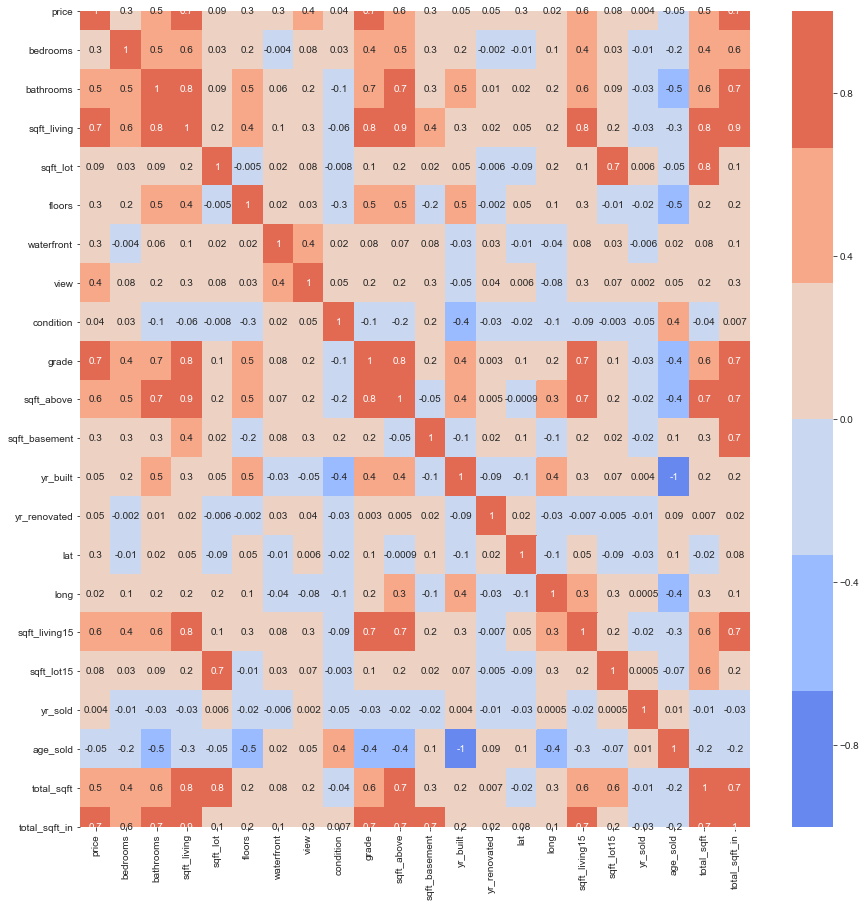

In [140]:
correlation = kc.corr()

plt.figure(figsize=(15, 15))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, cmap=sns.color_palette('coolwarm'), vmin=-1, fmt = '.1g')

sqft_living, grade, and total_sqft_in columns all have high correlations to the price column

In [123]:
kc.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308063,0.525053,0.701587,0.090338,0.257052,0.259220,0.395734,0.035393,0.668307,0.605695,0.319082,0.054273,0.051973,0.307868,0.022417,0.585304,0.083189
bedrooms,0.308063,1.000000,0.514368,0.577934,0.032735,0.177391,-0.003733,0.078523,0.026402,0.356095,0.479148,0.296548,0.155462,-0.001983,-0.010415,0.132318,0.392874,0.030952
bathrooms,0.525053,0.514368,1.000000,0.755277,0.088921,0.502285,0.061115,0.186451,-0.126682,0.665312,0.686173,0.277583,0.507565,0.012100,0.024487,0.225025,0.569139,0.088854
sqft_living,0.701587,0.577934,0.755277,1.000000,0.173768,0.353529,0.101982,0.282532,-0.059783,0.762398,0.876553,0.427422,0.318217,0.016474,0.052383,0.241856,0.756208,0.184801
sqft_lot,0.090338,0.032735,0.088921,0.173768,1.000000,-0.005025,0.021465,0.075298,-0.008375,0.115122,0.184325,0.015097,0.052646,-0.005873,-0.085143,0.230137,0.145142,0.717095
floors,0.257052,0.177391,0.502285,0.353529,-0.005025,1.000000,0.020357,0.028436,-0.264138,0.458694,0.523367,-0.242348,0.489410,-0.001946,0.049419,0.125329,0.279176,-0.010850
waterfront,0.259220,-0.003733,0.061115,0.101982,0.021465,0.020357,1.000000,0.382000,0.016224,0.081195,0.069931,0.080917,-0.025000,0.032202,-0.012282,-0.037845,0.082352,0.030605
view,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,0.382000,1.000000,0.045735,0.249727,0.166299,0.271689,-0.054564,0.044889,0.006141,-0.077894,0.279561,0.073332
condition,0.035393,0.026402,-0.126682,-0.059783,-0.008375,-0.264138,0.016224,0.045735,1.000000,-0.147326,-0.158830,0.167889,-0.361398,-0.029621,-0.015594,-0.105475,-0.093172,-0.002702
grade,0.668307,0.356095,0.665312,0.762398,0.115122,0.458694,0.081195,0.249727,-0.147326,1.000000,0.755977,0.164272,0.448255,0.003037,0.113787,0.200821,0.713462,0.121435


In [124]:
abs(kc.corr())>0.75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,True,False,False,False,False,False,True,True,False,False,False,False,False,True,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
grade,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False


In [78]:
### kc = kc.drop('sqft_living', axis=1)

In [125]:
abs(kc.corr())>0.75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,True,False,False,False,False,False,True,True,False,False,False,False,False,True,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
grade,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False


In [126]:
kc.price = (kc.price - kc.price.mean()) / kc.price.std()
kc.bedrooms = (kc.bedrooms - kc.bedrooms.mean()) / kc.bedrooms.std()
kc.bathrooms = (kc.bathrooms - kc.bathrooms.mean()) / kc.bathrooms.std()
kc.sqft_living = (kc.sqft_living - kc.sqft_living.mean()) / kc.sqft_living.std()
kc.sqft_lot = (kc.sqft_lot - kc.sqft_lot.mean()) / kc.sqft_lot.std()
kc.floors = (kc.floors - kc.floors.mean()) / kc.floors.std()
kc.sqft_above = (kc.sqft_above - kc.sqft_above.mean()) / kc.sqft_above.std()
kc.sqft_basement = (kc.sqft_basement - kc.sqft_basement.mean()) / kc.sqft_basement.std()
kc.sqft_living15 = (kc.sqft_living15 - kc.sqft_living15.mean()) / kc.sqft_living15.std()
kc.sqft_lot15 = (kc.sqft_lot15 - kc.sqft_lot15.mean()) / kc.sqft_lot15.std()


In [127]:
kc.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,-0.869142,-0.402670,-1.451612,-0.980796,-0.228143,-0.915377,False,0,3,7,-0.735199,-0.649265,1955,0,98178,47.5112,-122.257,-0.943337,-0.260538
1,2014-12-09,-0.005621,-0.402670,0.174717,0.534279,-0.189670,0.937142,False,0,3,7,0.460821,0.261204,1951,1991,98125,47.7210,-122.319,-0.432478,-0.187562
2,2015-02-25,-0.983604,-1.482106,-1.451612,-1.427689,-0.123020,-0.915377,False,0,3,6,-1.230520,-0.649265,1933,1933,98028,47.7379,-122.233,1.070906,-0.172042
3,2014-12-09,0.174677,0.676765,1.150514,-0.130610,-0.243851,-0.915377,False,0,5,7,-0.892252,1.422051,1965,0,98136,47.5208,-122.393,-0.914145,-0.284386
4,2015-02-18,-0.082111,-0.402670,-0.150549,-0.435805,-0.169419,-0.915377,False,0,3,8,-0.131148,-0.649265,1987,0,98074,47.6168,-122.045,-0.271923,-0.192551


In [128]:
kc.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.153400e+04,2.153400e+04,2.153400e+04,2.153400e+04,2.153400e+04,2.153400e+04,21534.000000,21534.000000,21534.000000,2.153400e+04,2.153400e+04,21534.000000,21534.000000,21534.000000,21534.000000,2.153400e+04,2.153400e+04
mean,5.279411e-18,-6.368290e-17,3.167647e-17,8.974999e-17,2.639706e-17,-1.689412e-16,0.233863,3.409724,7.657425,4.751470e-17,4.223529e-17,1971.002275,419.332683,47.560180,-122.213948,-8.447058e-17,2.375735e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.765686,0.650654,1.172643,1.000000e+00,1.000000e+00,29.376044,807.708039,0.138528,0.140735,1.000000e+00,1.000000e+00
min,-1.262247e+00,-2.561542e+00,-2.102143e+00,-1.863681e+00,-3.521151e-01,-9.153766e-01,0.000000,1.000000,3.000000,-1.713760e+00,-6.492651e-01,1900.000000,0.000000,47.155900,-122.519000,-2.316817e+00,-4.439503e-01
25%,-5.956890e-01,-4.026705e-01,-4.758148e-01,-7.083005e-01,-2.428841e-01,-9.153766e-01,0.000000,3.000000,7.000000,-7.231177e-01,-6.492651e-01,1951.000000,0.000000,47.471200,-122.328000,-7.243975e-01,-2.807171e-01
50%,-2.460191e-01,-4.026705e-01,1.747167e-01,-1.851093e-01,-1.806080e-01,1.088249e-02,0.000000,3.000000,7.000000,-2.761205e-01,-6.492651e-01,1975.000000,0.000000,47.571900,-122.230000,-2.135388e-01,-1.882586e-01
75%,2.866810e-01,6.767651e-01,4.999824e-01,5.124791e-01,-1.063998e-01,9.371416e-01,0.000000,4.000000,8.000000,5.091449e-01,6.026295e-01,1997.000000,0.000000,47.678100,-122.125000,5.454512e-01,-9.789148e-02
max,1.955950e+01,3.198040e+01,7.655828e+00,1.249138e+01,3.954229e+01,3.715919e+00,4.000000,5.000000,13.000000,9.207469e+00,1.032188e+01,2015.000000,2015.000000,47.777600,-121.315000,6.164896e+00,3.149637e+01


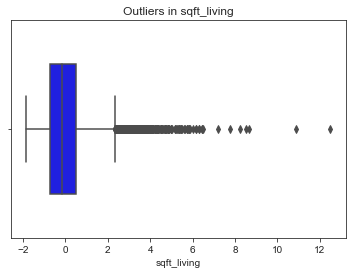

In [129]:
sns.boxplot(x=kc['sqft_living'], fliersize=5, color='b', width=0.6)
plt.title('Outliers in sqft_living')
plt.show()

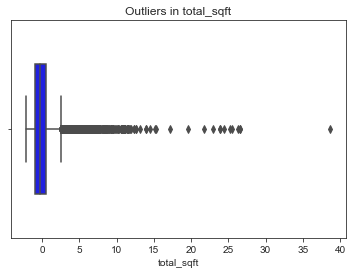

In [144]:
sns.boxplot(x=kc['total_sqft'], fliersize=5, color='b', width=0.6)
plt.title('Outliers in total_sqft')
plt.show()

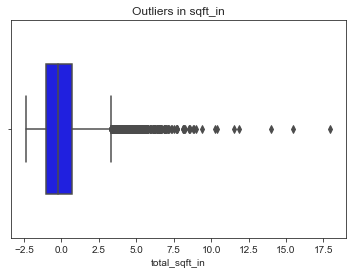

In [145]:
sns.boxplot(x=kc['total_sqft_in'], fliersize=5, color='b', width=0.6)
plt.title('Outliers in sqft_in')
plt.show()

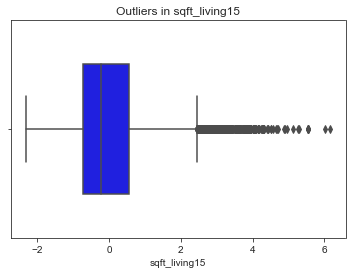

In [130]:
sns.boxplot(x=kc['sqft_living15'], fliersize=5, color='b', width=0.6)
plt.title('Outliers in sqft_living15')
plt.show()

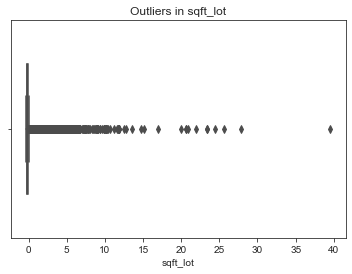

In [132]:
sns.boxplot(x=kc['sqft_lot'], fliersize=5, color='b', width=0.6)
plt.title('Outliers in sqft_lot')
plt.show()

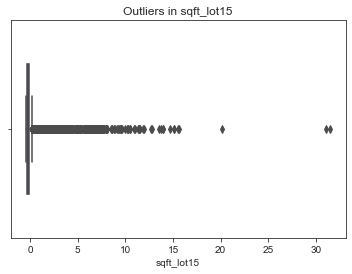

In [131]:
sns.boxplot(x=kc['sqft_lot15'], fliersize=5, color='b', width=0.6)
plt.title('Outliers in sqft_lot15')
plt.show()

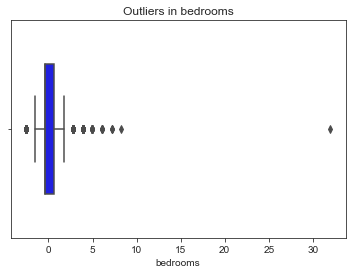

In [133]:
sns.boxplot(x=kc['bedrooms'], fliersize=5, color='b', width=0.6)
plt.title('Outliers in bedrooms')
plt.show()

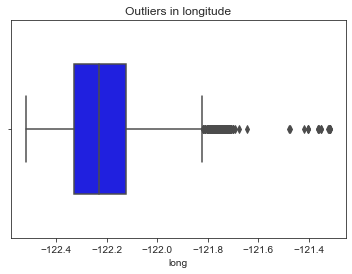

In [134]:
sns.boxplot(x=kc['long'], fliersize=5, color='b', width=0.6)
plt.title('Outliers in longitude')
plt.show()

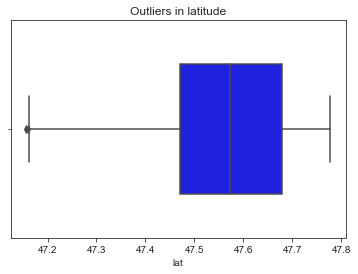

In [135]:
sns.boxplot(x=kc['lat'], fliersize=5, color='b', width=0.6)
plt.title('Outliers in latitude')
plt.show()

In [155]:
def remove_outliers(kc, col, threshold = 4):
    zscores = stats.zscore(kc[col])
    indices = np.abs(np.where(zscores > threshold))
    return indices[0]

check_col = ['price', 'sqft_living', 'sqft_lot', 'total_sqft', 'total_sqft_in', 'bedrooms', 'bathrooms', 
                   'sqft_living15', 'sqft_lot15', 'lat', 'long']


all_indices = []
for col in check_col:
    indices = remove_outliers(kc, col, threshold = 4)
    all_indices.extend(indices)
all_indices = np.unique(all_indices)

In [85]:
kc.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
sns.boxplot(x=kc['sqft_living'], fliersize=5, color='b', width=0.6)
plt.title('Outliers in sqft_living')
plt.show()

In [ ]:
data = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'yr_sold',
       'age_sold', 'total_sqft_in', 'total_sqft']

for column in data:
    plt.scatter(kc[column], kc.price, label=column)
    plt.legend()
    plt.show()